# YOLO Model for Person detection

In [3]:
# Import the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import logging

%matplotlib inline
logging.disable(logging.WARNING)

In [4]:
# Define the model using single class configuration file and model checkpoints 
from darkflow.net.build import TFNet
options = {"model": "yolov4_config/tiny-yolo-voc-1c.cfg",
           "load": -1}
tfnet2 = TFNet(options)
tfnet2.load_from_ckpt()

Parsing yolov4_config/tiny-yolo-voc-1c.cfg
Loading None ...
Finished in 9.131431579589844e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                    

### Predicting single image

In [10]:
#Feed-in input image for person detection
img = cv2.imread("examples/test_image_0.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
prediction = tfnet2.return_predict(img)
print(prediction)

[{'label': 'person', 'confidence': 0.63252443, 'topleft': {'x': 174, 'y': 91}, 'bottomright': {'x': 271, 'y': 390}}]


In [11]:
# Generate bounding boxes for identified images
def generate_boxes(img , predictions):
    newImage = np.copy(img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

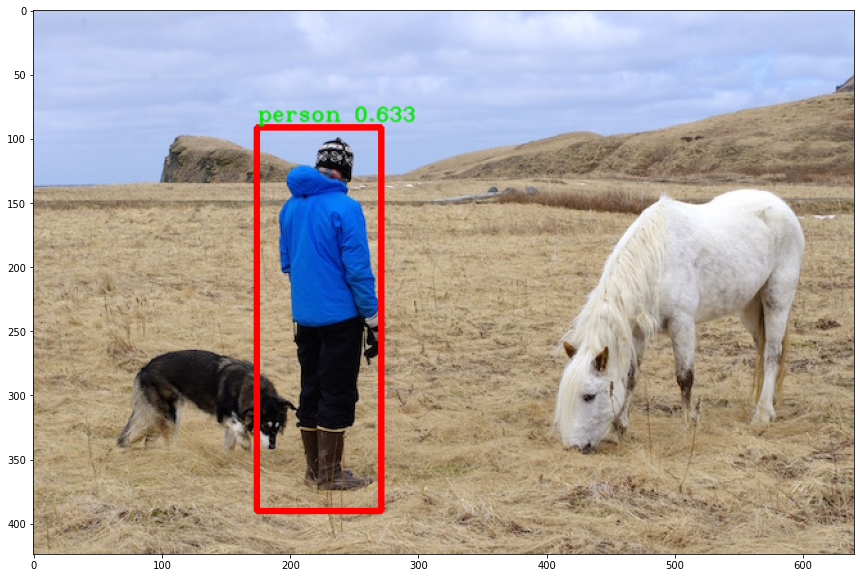

In [12]:
#Show the images with bounding boxes and confidence interval for input images
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(generate_boxes(img, prediction))
plt.savefig("./ModelOutput/test_image_0_processed.jpg", dpi=300)

In [13]:
#Detect Person in a Video
cap = cv2.VideoCapture('examples/Market_Street.mp4')
number_frame = 18.0 #higher frames better quality of the video
video_size = (1280,720)

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
output_video_name="processed_video"
out = cv2.VideoWriter('{:s}.mp4'.format(output_video_name),fourcc, number_frame,video_size)

print("[INFO] Start processing video....")
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        prediction = tfnet2.return_predict(frame)
        
        new_frame = generate_boxes(frame, prediction)

        # Display the resulting frame
        out.write(new_frame)
        cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
print("[INFO] Finished! Processed video is saved as {:s}.mp4".format(output_video_name)) 

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()

[INFO] Start processing video....
[INFO] Finished! Processed video is saved as processed_video.mp4


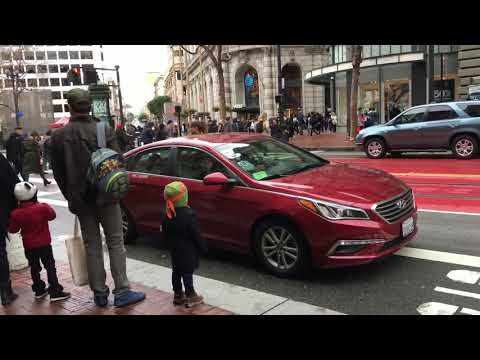

In [15]:
### Visualize our result for video detection
from IPython.display import YouTubeVideo
YouTubeVideo('MUbGCFcVe3E', width=850, height=512)